In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)


In [ ]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
#Check for Stationarity
#TO apply ARIMA, the time series should be stationary
from statsmodels.tsa.stattools import adfuller

#Perform ADF test
result= adfuller(data['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

# If p-value > 0.05, the series is non-stationary
if result[1] > 0.05:
    print('Series is non-stationary')
else:
    print('Series is stationary')

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598
Series is non-stationary


ADF Statistic (differenced): -2.8292668241700047
p-value (differenced): 0.05421329028382478


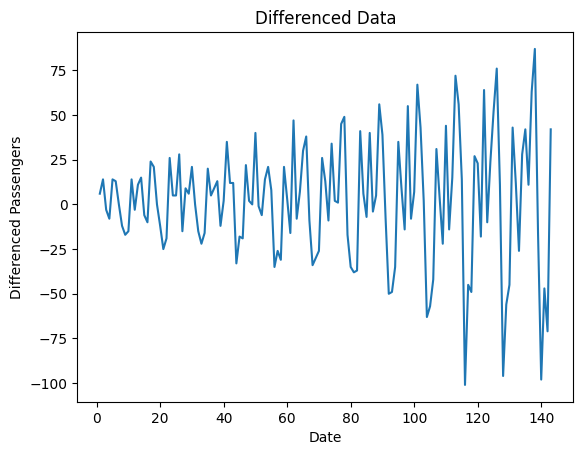

The data is not stationary after differencing.


In [ ]:
data_series = data['Passengers']  # Replace 'Passengers' with your actual column name

# Differencing the data
data_diff = data_series.diff().dropna()

# Perform ADF test on differenced data
result_diff = adfuller(data_diff)

# Print test statistic and p-value
print('ADF Statistic (differenced):', result_diff[0])
print('p-value (differenced):', result_diff[1])

# Plot the differenced data
plt.plot(data_diff)
plt.title('Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.show()

# Interpretation
if result_diff[0] < result_diff[4]['5%'] and result_diff[1] < 0.05:
    print('The data is stationary after differencing.')
else:
    print('The data is not stationary after differencing.')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

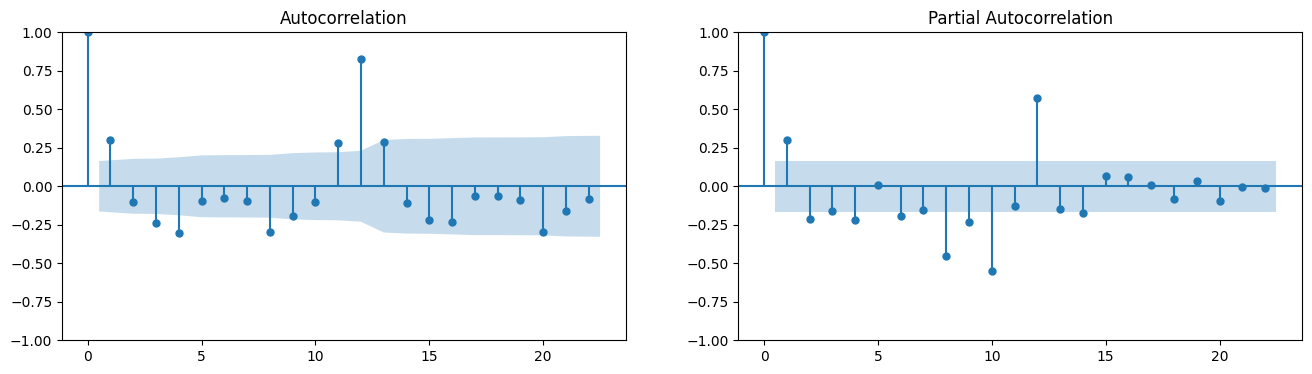

In [ ]:
# Determine the order of the ARIMA model using ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data_diff, ax=axes[0])
plot_pacf(data_diff, ax=axes[1])
plt.show()

ADF Statistic: -6.224618083784302
p-value: 5.124470113639822e-08
Critial Values:
   1%, -3.5778480370438146
Critial Values:
   5%, -2.925338105429433
Critial Values:
   10%, -2.6007735310095064
ADF Statistic: -3.5636534515904073
p-value: 0.006495145234388586
Critial Values:
   1%, -3.626651907578875
Critial Values:
   5%, -2.9459512825788754
Critial Values:
   10%, -2.6116707716049383


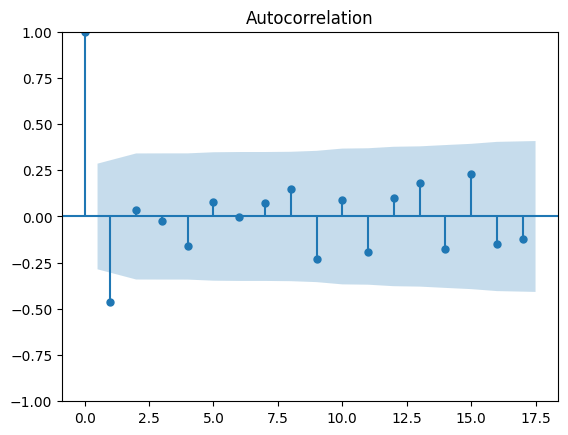

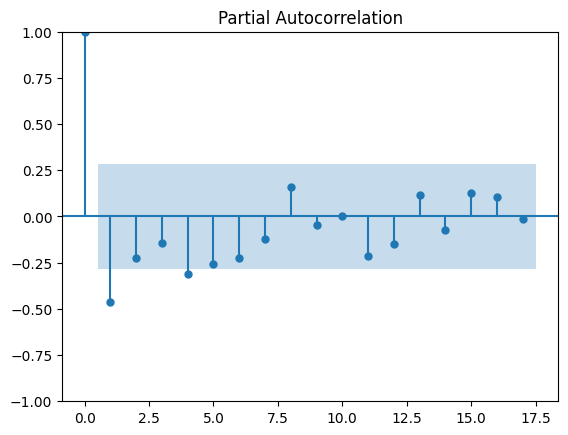

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   38
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -57.394
Date:                Fri, 26 Jul 2024   AIC                            120.787
Time:                        05:40:34   BIC                            125.620
Sample:                    01-31-2020   HQIC                           122.491
                         - 02-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0954      0.179      0.534      0.593      -0.255       0.445
ma.L1         -0.9420      0.110     -8.597      0.000      -1.157      -0.727
sigma2         1.2344      0.276      4.477      0.0

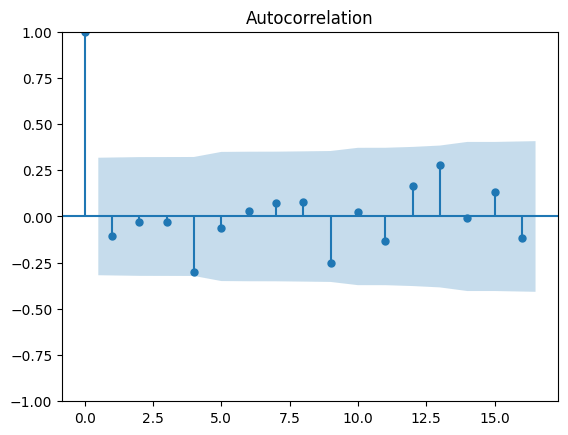

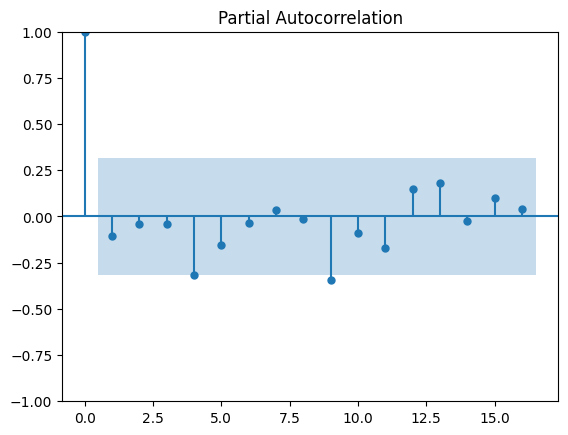

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dat

Best ARIMA parameters: (0, 0, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


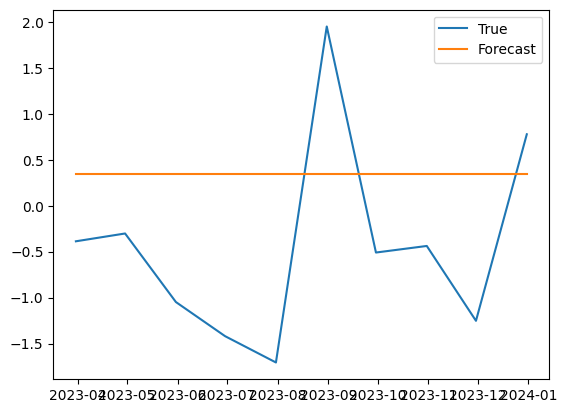

RMSE: 1.3006051806502144


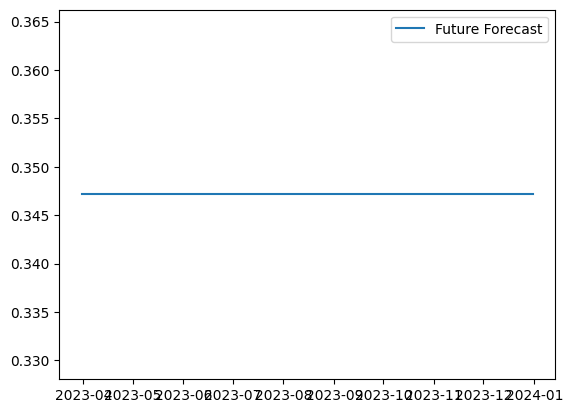

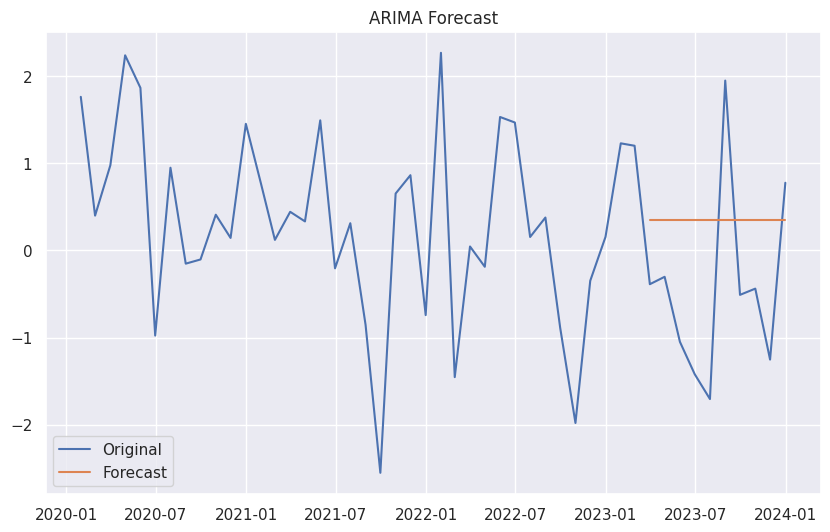

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Example data generation (Replace this with your actual data)
np.random.seed(0)
date_rng = pd.date_range(start='1/1/2020', end='1/1/2024', freq='M')
df = pd.DataFrame(date_rng, columns=['date'])
df['value'] = np.random.randn(len(df))
df.set_index('date', inplace=True)

# 1. Data Preprocessing: Check for stationarity and make stationary if needed
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

test_stationarity(df['value'])

# Differencing if necessary
df['value_diff'] = df['value'].diff().dropna()
test_stationarity(df['value_diff'].dropna())

# 2. Model Selection: ACF and PACF plots
plot_acf(df['value_diff'].dropna())
plot_pacf(df['value_diff'].dropna())
plt.show()

# 3. Model Training and Validation: Split data
train_size = int(len(df) * 0.8)
train, test = df['value'][:train_size], df['value'][train_size:]

# 4. Model Diagnostics: Fit ARIMA model and check residuals
model = ARIMA(train, order=(1,1,1))
fitted_model = model.fit()
print(fitted_model.summary())

# Residuals analysis
residuals = fitted_model.resid
plot_acf(residuals)
plot_pacf(residuals)
plt.show()

# 5. Parameter Tuning: Grid search for best p, d, q
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
best_aic = np.inf
best_params = None
for param in pdq:
    try:
        model = ARIMA(train, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue
print('Best ARIMA parameters:', best_params)

# 6. Model Evaluation: Evaluate on validation set
best_model = ARIMA(train, order=best_params).fit()
forecast = best_model.forecast(steps=len(test))
plt.plot(test.index, test, label='True')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(np.mean((forecast - test)**2))
print('RMSE:', rmse)

# 7. Incorporate Exogenous Variables (Example with one exogenous variable)
# Assuming df has an 'exog' column with external variable
if 'exog' in df.columns:
    model = ARIMA(train, order=best_params, exog=train['exog'])
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=len(test), exog=test['exog'])
    plt.plot(test.index, test, label='True')
    plt.plot(test.index, forecast, label='Forecast with Exog')
    plt.legend()
    plt.show()

# 8. Update Model Regularly: Example function to retrain model
def update_model(new_data):
    global best_model
    best_model = best_model.append(new_data)
    best_model = best_model.fit()
    return best_model

forecast = best_model.forecast(steps=len(test)) # Match the length of test data
plt.plot(forecast.index, forecast, label='Future Forecast')
plt.legend()
plt.show()

# 10. Documentation and Reporting
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 6))
plt.plot(df['value'], label='Original')
plt.plot(test.index, forecast, label='Forecast')  # Use test.index to match the forecast index

plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# **Check for Stationarity (ADF Test) and Plot**

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598
Series is non-stationary


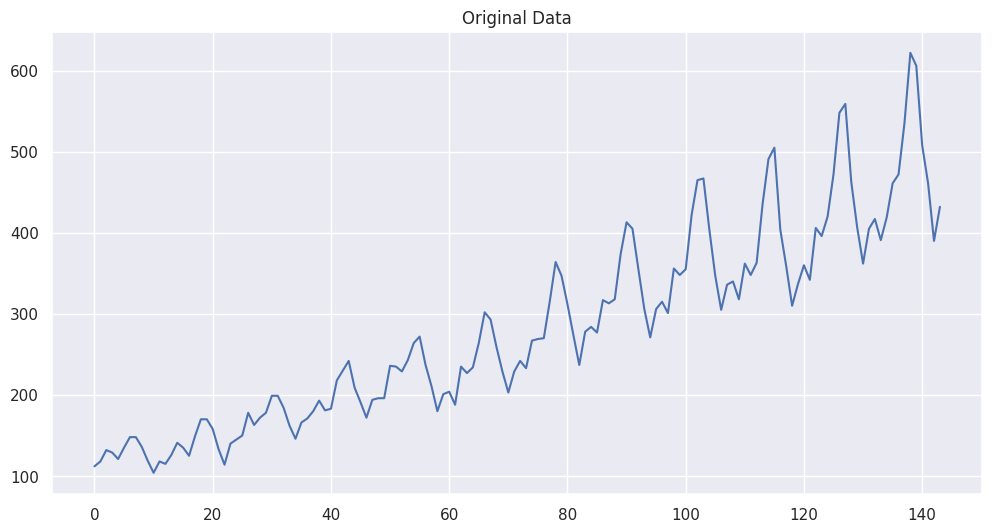

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

if result[1] > 0.05:
    print('Series is non-stationary')
else:
    print('Series is stationary')

# Plot the original data
data['Passengers'].plot(title='Original Data', figsize=(12, 6))
plt.show()

# **Difference the Data and Plot**

ADF Statistic (differenced): -2.8292668241700047
p-value (differenced): 0.05421329028382478


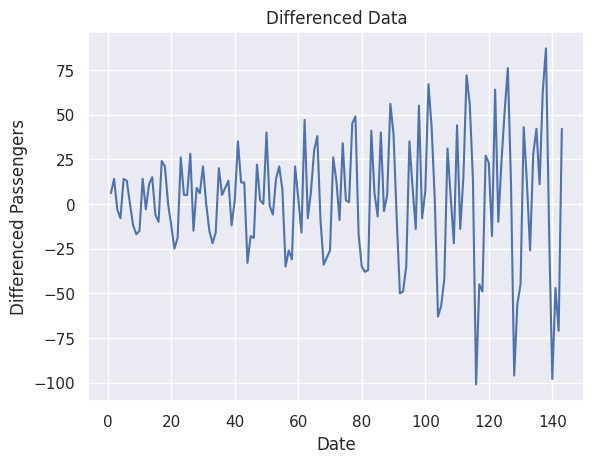

In [ ]:
data_series = data['Passengers']
data_diff = data_series.diff().dropna()

result_diff = adfuller(data_diff)
print(f'ADF Statistic (differenced): {result_diff[0]}')
print(f'p-value (differenced): {result_diff[1]}')

import matplotlib.pyplot as plt
plt.plot(data_diff)
plt.title('Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.show()


# **Determine the Order of the ARIMA Model (ACF and PACF Plots):**

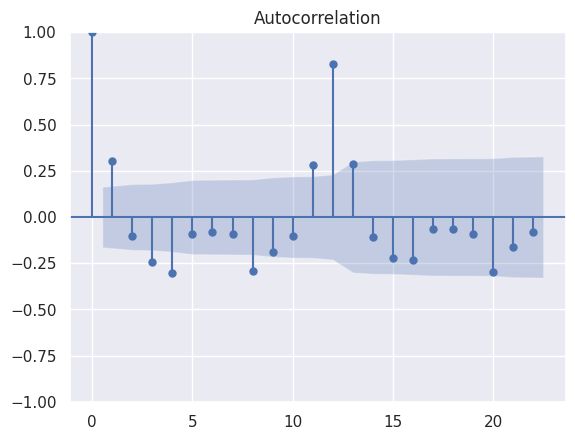

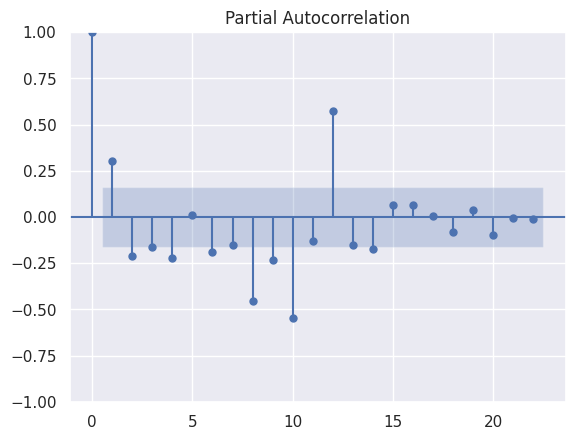

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff)
plot_pacf(data_diff)
plt.show()


# **Fit the ARIMA Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_series, order=(2, 1, 2))  # Replace (p, d, q) with determined values
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Fri, 26 Jul 2024   AIC                           1353.347
Time:                        05:40:39   BIC                           1368.161
Sample:                             0   HQIC                          1359.366
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# **Make Predictions and Plot:**





In [ ]:
forecast = model_fit.forecast(steps=10)  # Adjust steps as needed
print(forecast)


144    439.854513
145    465.296054
146    500.665761
147    535.971659
148    561.690109
149    571.314405
150    562.974263
151    539.731146
152    508.529538
153    478.147818
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 128.890
Date:                Fri, 26 Jul 2024   AIC                           -247.780
Time:                        05:40:40   BIC                           -232.965
Sample:                    01-01-1949   HQIC                          -241.760
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2432      0.166      1.469      0.142      -0.081       0.568
ar.L2          0.2677      0.199      1.344      0.179      -0.123       0.658
ma.L1         -0.0867      0.118     -0.732      0.4

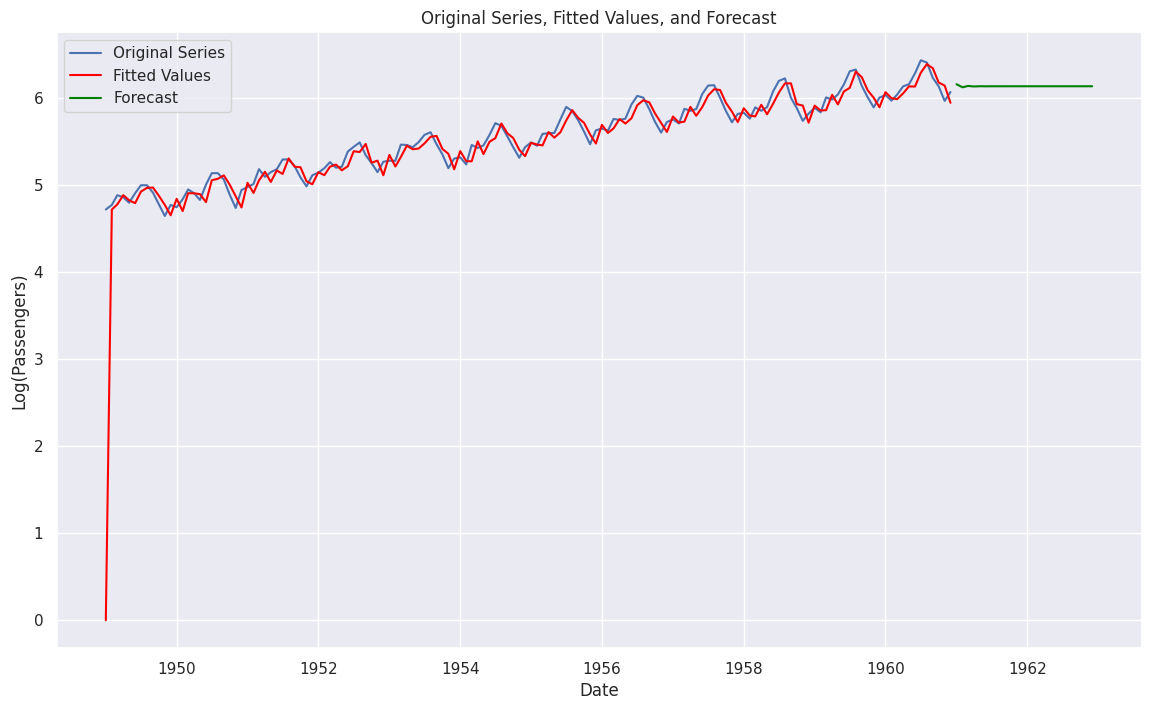

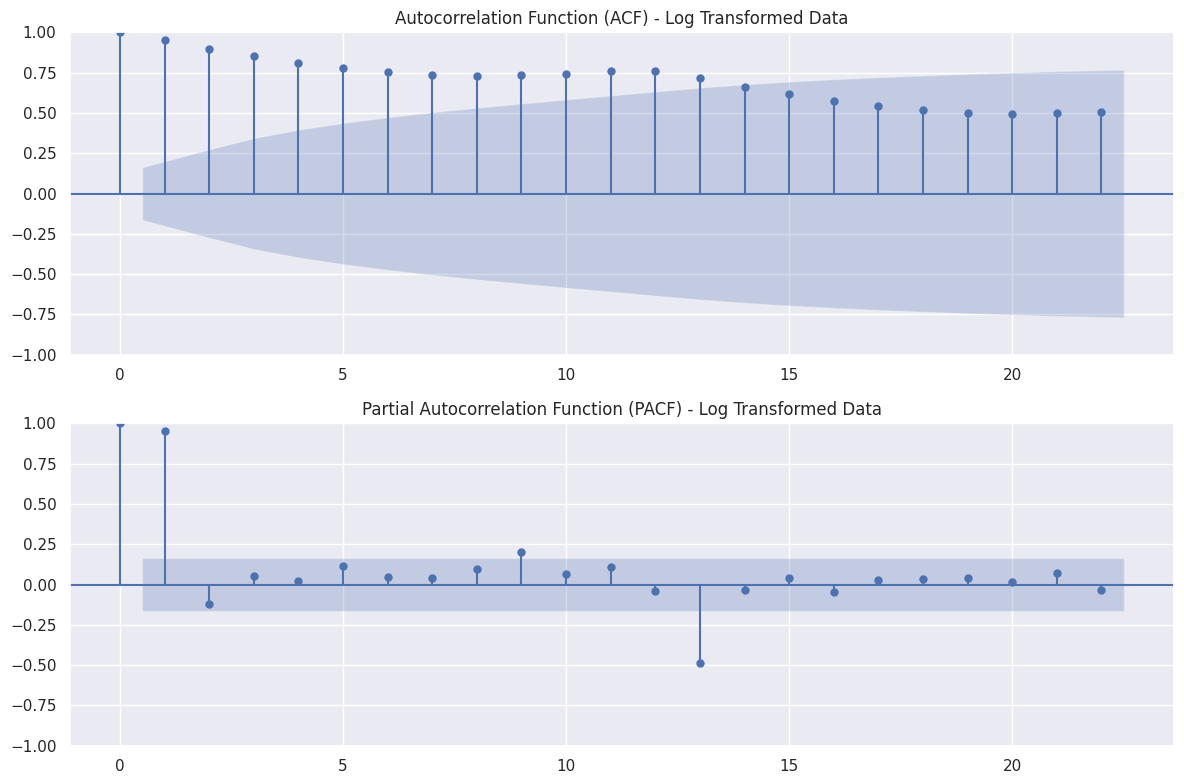

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Log transformation to stabilize the variance
data_log = np.log(data['Passengers'])

# Fit ARIMA model
model = ARIMA(data_log, order=(2, 1, 2))
arima_model = model.fit()

# Summary of the model
print(arima_model.summary())

# Plotting the original series, fitted values, and forecast
plt.figure(figsize=(14, 8))

# Original time series
plt.plot(data_log, label='Original Series')

# Fitted values
plt.plot(arima_model.fittedvalues, color='red', label='Fitted Values')

# Forecast future values (e.g., next 24 months)
forecast_steps = 24
forecast = arima_model.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data_log.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

# Combine original, fitted values, and forecast in the same plot
plt.plot(forecast_index, forecast, color='green', label='Forecast')

plt.legend()
plt.title('Original Series, Fitted Values, and Forecast')
plt.xlabel('Date')
plt.ylabel('Log(Passengers)')
plt.show()

# Create the ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(data_log, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF) - Log Transformed Data')

# Plot PACF
plot_pacf(data_log, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF) - Log Transformed Data')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 155.407
Date:                Fri, 26 Jul 2024   AIC                           -292.814
Time:                        05:40:43   BIC                           -266.149
Sample:                    01-01-1949   HQIC                          -281.979
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6429      0.046     13.986      0.000       0.553       0.733
ar.L2         -0.1178      0.062     -1.906      0.057      -0.239       0.003
ar.L3          0.5786      0.053     10.934      0.0

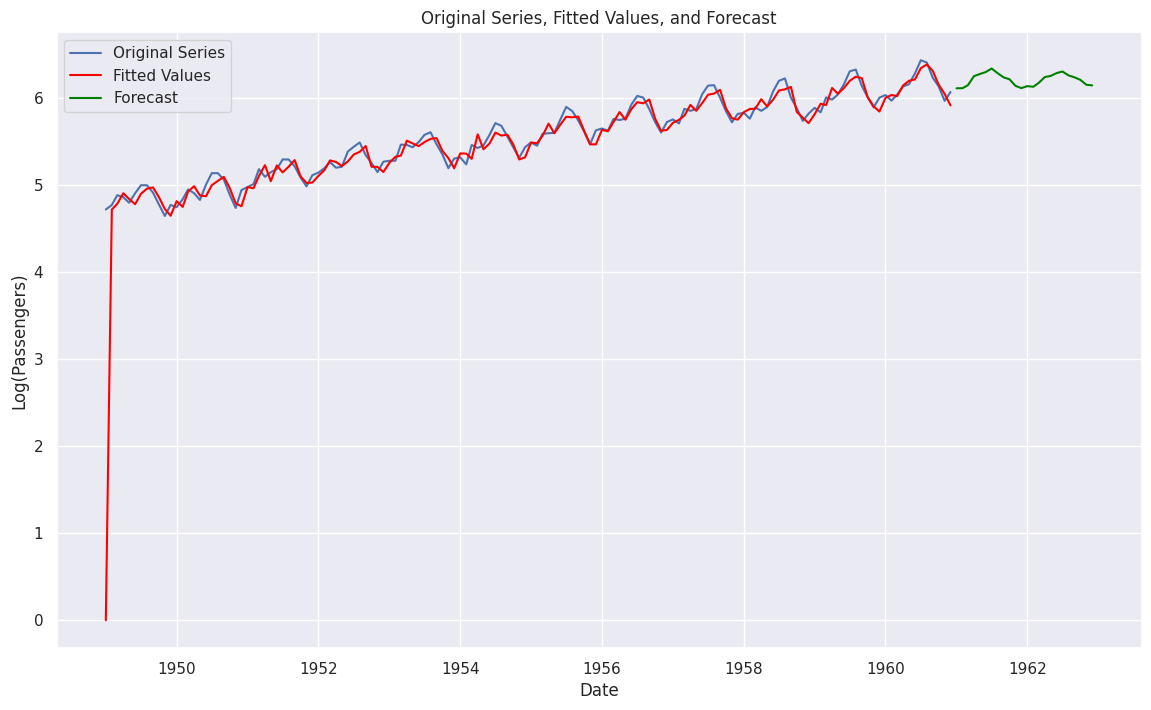

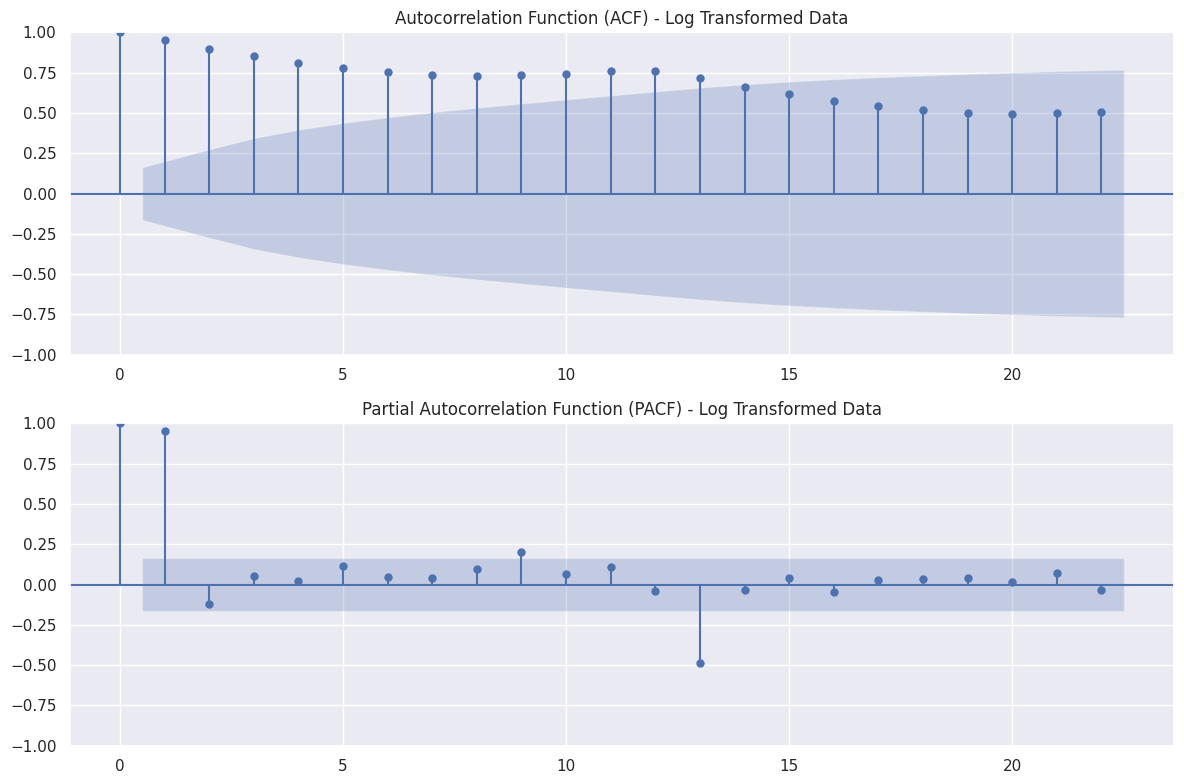

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Log transformation to stabilize the variance
data_log = np.log(data['Passengers'])

# Fit ARIMA model
model = ARIMA(data_log, order=(4, 1, 4))
arima_model = model.fit()

# Summary of the model
print(arima_model.summary())

# Plotting the original series, fitted values, and forecast
plt.figure(figsize=(14, 8))

# Original time series
plt.plot(data_log, label='Original Series')

# Fitted values
plt.plot(arima_model.fittedvalues, color='red', label='Fitted Values')

# Forecast future values (e.g., next 24 months)
forecast_steps = 24
forecast = arima_model.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data_log.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

# Combine original, fitted values, and forecast in the same plot
plt.plot(forecast_index, forecast, color='green', label='Forecast')

plt.legend()
plt.title('Original Series, Fitted Values, and Forecast')
plt.xlabel('Date')
plt.ylabel('Log(Passengers)')
plt.show()

# Create the ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(data_log, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF) - Log Transformed Data')

# Plot PACF
plot_pacf(data_log, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF) - Log Transformed Data')

plt.tight_layout()
plt.show()


# **Seasonal Decomposition**

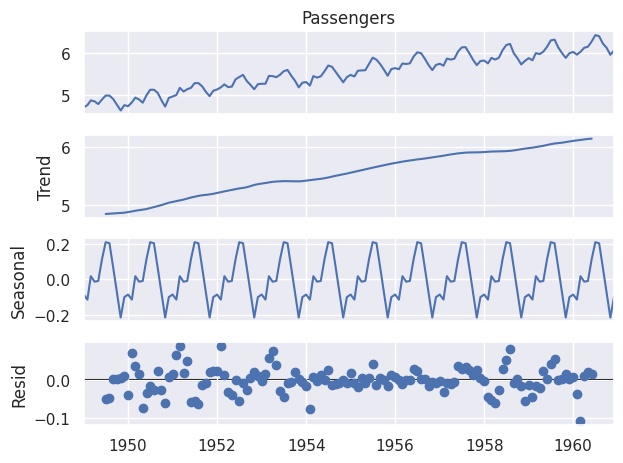

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data_log, model='additive')
result.plot()
plt.show()


# **Grid Search for ARIMA Hyperparameters**

In [ ]:
import itertools
import warnings
warnings.filterwarnings("ignore")

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_order = None
best_mdl = None

for param in pdq:
    try:
        temp_mdl = ARIMA(data_log, order=param).fit()
        if temp_mdl.aic < best_aic:
            best_aic = temp_mdl.aic
            best_order = param
            best_mdl = temp_mdl
    except:
        continue

print(f'Best ARIMA order: {best_order}')
print(f'Best AIC: {best_aic}')


Best ARIMA order: (2, 1, 1)
Best AIC: -251.46350910456272


# **Residual Diagnostics**

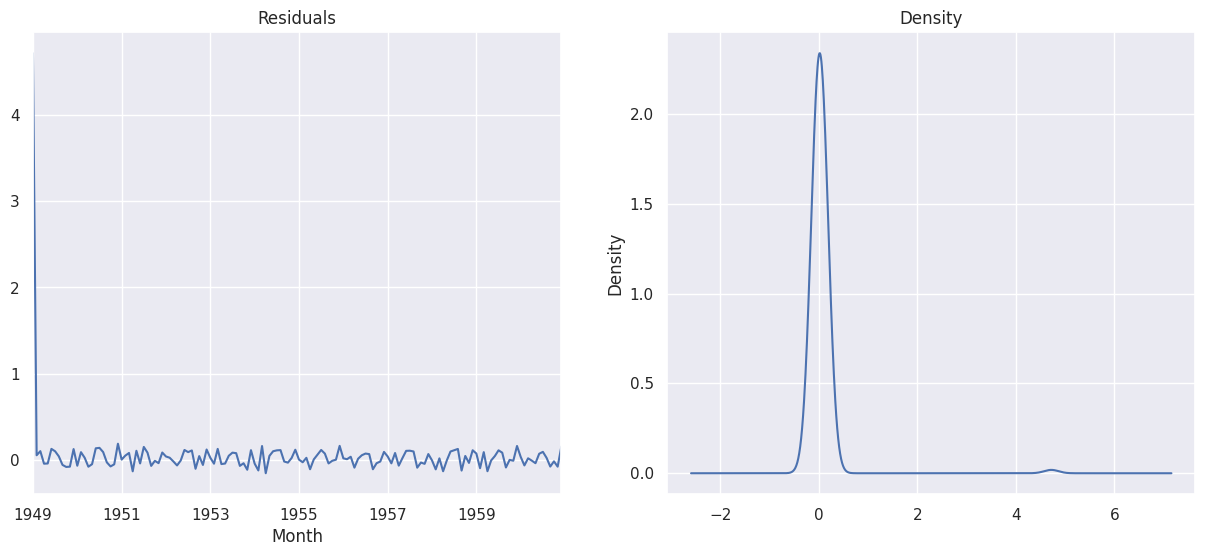

Ljung-Box test p-values:
1     0.961900
2     0.987833
3     0.991113
4     0.996210
5     0.996200
6     0.998625
7     0.999602
8     0.999803
9     0.999861
10    0.999922
Name: lb_pvalue, dtype: float64


In [ ]:
residuals = arima_model.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=10)
print('Ljung-Box test p-values:')
# Access the p-values using the column name instead of a numerical index
print(lb_test['lb_pvalue'])

# **Rolling Forecast Origin (Backtesting):**

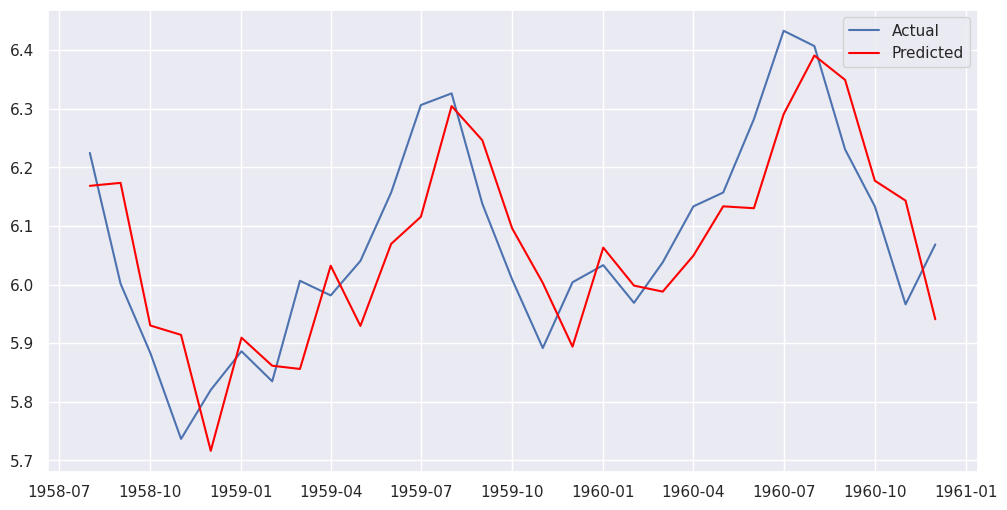

In [ ]:
train_size = int(len(data_log) * 0.8)
train, test = data_log[:train_size], data_log[train_size:]

history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])

plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.legend()
plt.show()


# **Ensemble Methods**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(data_log, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()
print(sarima_model.summary())


                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                 245.859
Date:                              Fri, 26 Jul 2024   AIC                           -477.718
Time:                                      05:41:08   BIC                           -457.592
Sample:                                  01-01-1949   HQIC                          -469.540
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0279      0.993     -0.028      0.978      -1.973       1.918
ar.L2          0.24

# **Forecasting Intervals**

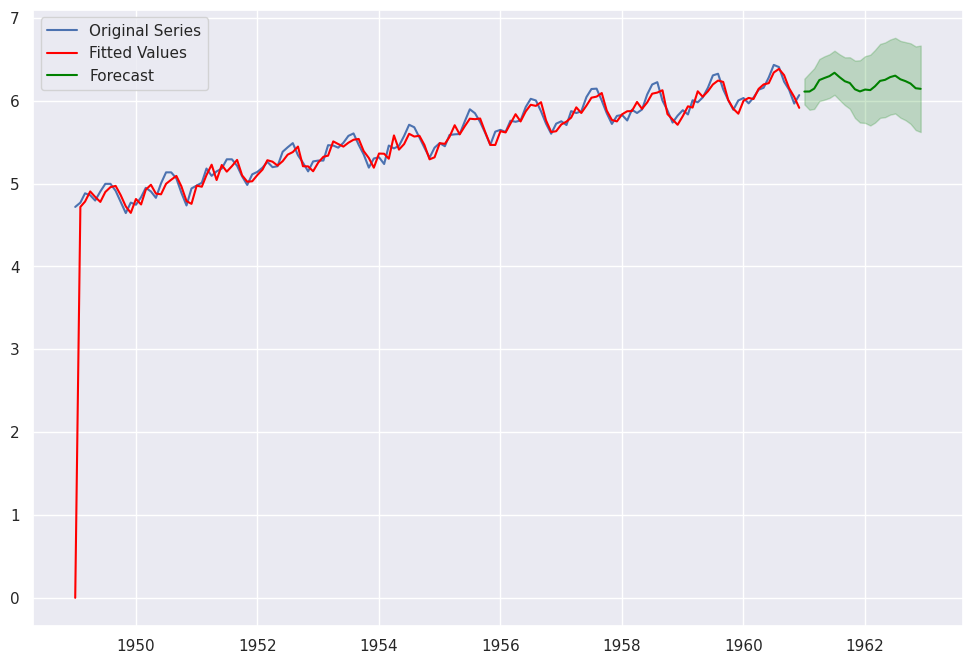

In [ ]:
forecast_result = arima_model.get_forecast(steps=24, alpha=0.05)

# Extract the predicted mean, standard error, and confidence interval
forecast = forecast_result.predicted_mean
stderr = forecast_result.se_mean
conf_int = forecast_result.conf_int()

forecast_index = pd.date_range(start=data_log.index[-1], periods=24 + 1, freq='MS')[1:]

plt.figure(figsize=(12, 8))
plt.plot(data_log, label='Original Series')
plt.plot(arima_model.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecast_index, forecast, color='green', label='Forecast')

# Access the confidence intervals correctly for a MultiIndex DataFrame
lower_conf = conf_int.iloc[:, 0]  # Access the first column (lower bound)
upper_conf = conf_int.iloc[:, 1]  # Access the second column (upper bound)

plt.fill_between(forecast_index, lower_conf, upper_conf, color='green', alpha=0.2)
plt.legend()
plt.show()

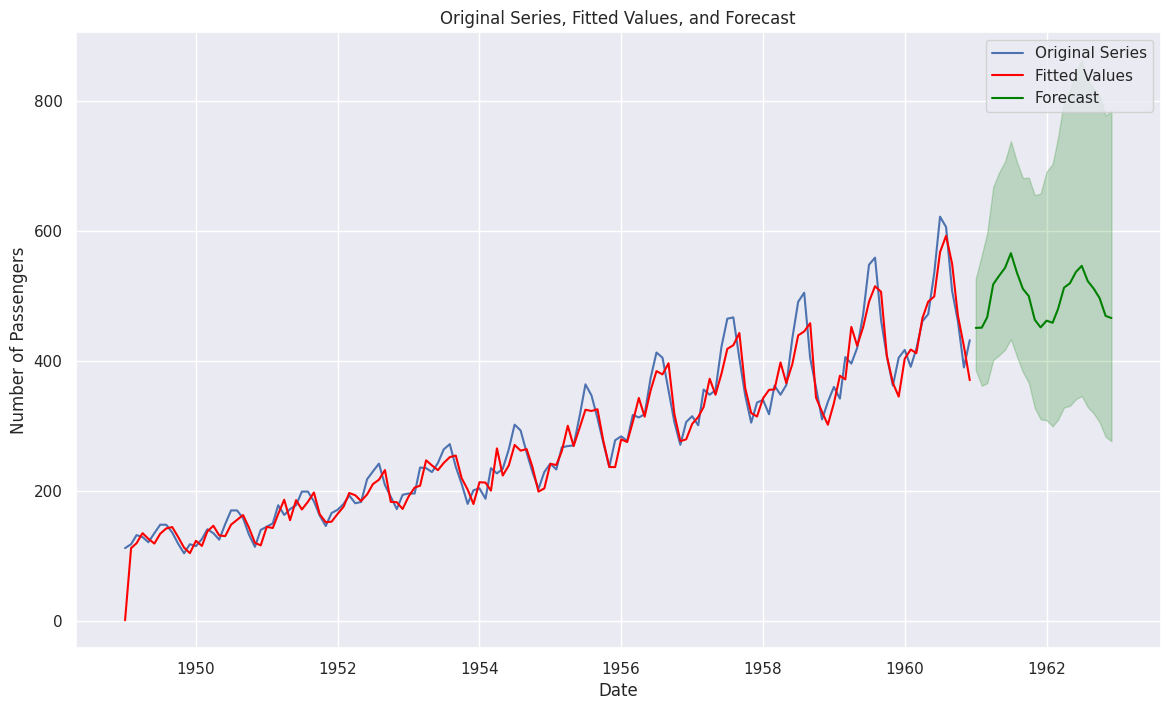

In [ ]:
# Forecast future values (e.g., next 24 months)
forecast_steps = 24
forecast_log = arima_model.get_forecast(steps=forecast_steps)
forecast_values_log = forecast_log.predicted_mean
forecast_conf_int = forecast_log.conf_int()

# Convert log forecasts back to original scale
forecast_values = np.exp(forecast_values_log)
forecast_conf_int = np.exp(forecast_conf_int)

# Create forecast index
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

# Plotting the original series, fitted values, and forecast
plt.figure(figsize=(14, 8))

# Original time series
plt.plot(data['Passengers'], label='Original Series')

# Fitted values (back-transformed)
fitted_values_log = arima_model.fittedvalues
fitted_values = np.exp(fitted_values_log)
plt.plot(fitted_values, color='red', label='Fitted Values')

# Combine original, fitted values, and forecast in the same plot
plt.plot(forecast_index, forecast_values, color='green', label='Forecast')

# Plot confidence intervals
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.2)

plt.legend()
plt.title('Original Series, Fitted Values, and Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


# **SARIMA**


*   Used for Forecasting current value and seasonal value(12th value)
*  P Q D S=12









In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the data
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(data_url, parse_dates=['Month'], index_col='Month')


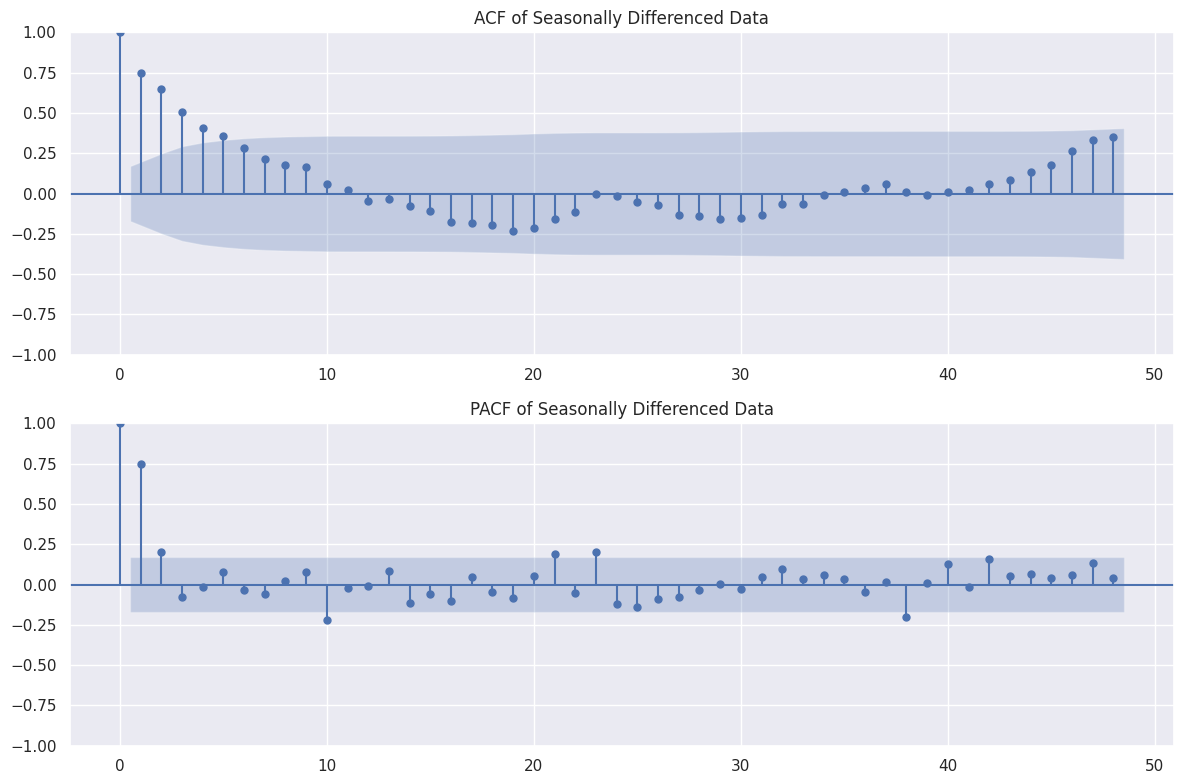

In [ ]:
# Seasonal differencing (for monthly data with annual seasonality, period=12)
df['Seasonal_Difference'] = df['Passengers'].diff(12)

# Dropping NA values after differencing
seasonal_diff = df['Seasonal_Difference'].dropna()

# Plot ACF and PACF for the seasonally differenced data
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(seasonal_diff, lags=48, ax=ax[0])
ax[0].set_title('ACF of Seasonally Differenced Data')

# PACF plot
plot_pacf(seasonal_diff, lags=48, ax=ax[1])
ax[1].set_title('PACF of Seasonally Differenced Data')

plt.tight_layout()
plt.show()

In [ ]:
# Seasonal ARIMA model
# Define the model
sarima_model = sm.tsa.statespace.SARIMAX(df['Passengers'],
                                         order=(1, 1, 1),
                                         seasonal_order=(1, 1, 1, 12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)

# Fit the model
sarima_results = sarima_model.fit()

# Summary of the model
print(sarima_results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.103
Date:                            Fri, 26 Jul 2024   AIC                            922.205
Time:                                    05:41:11   BIC                            936.016
Sample:                                01-01-1949   HQIC                           927.812
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.401     -0.573      0.567      -1.016       0.557
ma.L1         -0.0987      0.374   

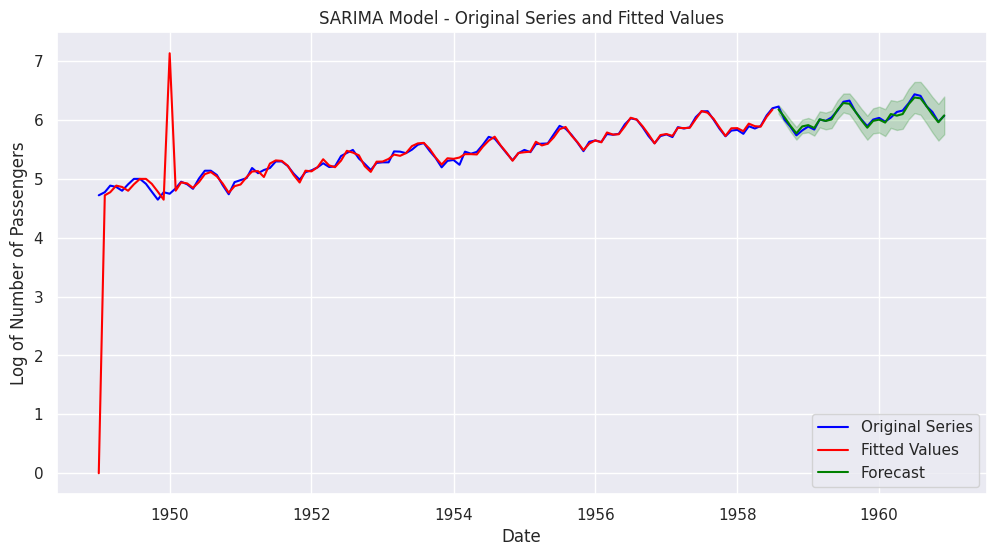

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming df is your DataFrame with a 'Passengers' column
# and an index of DateTime type.

# Log-transform the 'Passengers' data
df['Log_Passengers'] = np.log(df['Passengers'])

# Split data into training and testing sets
train_data = df['Log_Passengers'][:int(0.8*len(df))]
test_data = df['Log_Passengers'][int(0.8*len(df)):]

# Fit SARIMA model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model = model.fit(disp=False)

# Predicting in-sample (fitted values) and out-of-sample (forecast)
fitted_values = sarima_model.fittedvalues
forecast_steps = len(test_data)
forecast = sarima_model.get_forecast(steps=forecast_steps)
forecast_index = test_data.index
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Log_Passengers'], label='Original Series', color='blue')
plt.plot(train_data.index, fitted_values, label='Fitted Values', color='red')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.2)

plt.title('SARIMA Model - Original Series and Fitted Values')
plt.xlabel('Date')
plt.ylabel('Log of Number of Passengers')
plt.legend()
plt.show()


# **CATFISH CSV-ARIMA & SARIMA**

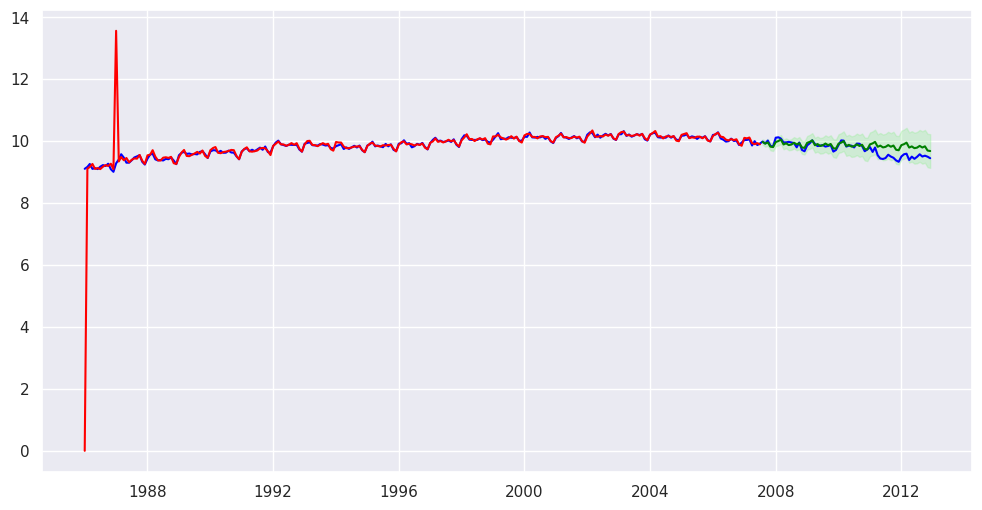

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data (assuming 'catfish.csv' is already loaded into a DataFrame 'data')
data = pd.read_csv('catfish.csv')

# Convert the Date column to datetime and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Log-transform the 'Total' data
data['Log_Total'] = np.log(data['Total'])

# Split data into training and testing sets
train_data = data['Log_Total'][:int(0.8*len(data))]
test_data = data['Log_Total'][int(0.8*len(data)):]

# Fit SARIMA model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model = model.fit(disp=False)

# Predicting in-sample (fitted values) and out-of-sample (forecast)
fitted_values = sarima_model.fittedvalues
forecast_steps = len(test_data)
forecast = sarima_model.get_forecast(steps=forecast_steps)
forecast_index = test_data.index
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Log_Total'], label='Original Series', color='blue')
plt.plot(train_data.index, fitted_values, label='Fitted Values', color='red')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='lightgreen', alpha=0.3)


ADF Statistic (differenced): -4.310935282406809
p-value (differenced): 0.0004252370851714975


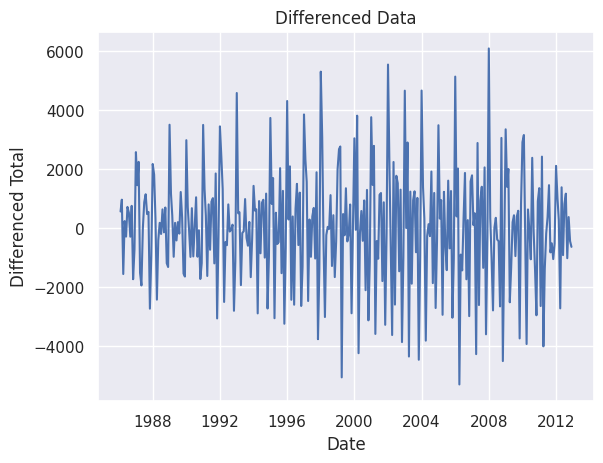

The data is stationary after differencing.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset
data = pd.read_csv('catfish.csv', parse_dates=['Date'], index_col='Date')

# Replace 'Passengers' with your actual column name, e.g., 'Catfish Sales'
data_series = data['Total']

# Differencing the data
data_diff = data_series.diff().dropna()

# Perform ADF test on differenced data
result_diff = adfuller(data_diff)

# Print test statistic and p-value
print('ADF Statistic (differenced):', result_diff[0])
print('p-value (differenced):', result_diff[1])

# Plot the differenced data
plt.plot(data_diff)
plt.title('Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Total')
plt.show()

# Interpretation
if result_diff[0] < result_diff[4]['5%'] and result_diff[1] < 0.05:
    print('The data is stationary after differencing.')
else:
    print('The data is not stationary after differencing.')


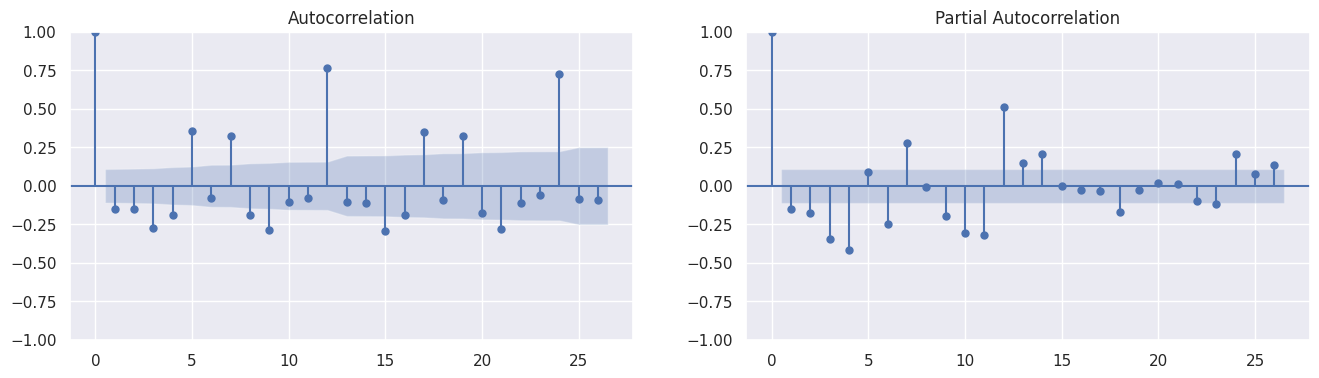

In [ ]:
# Determine the order of the ARIMA model using ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data_diff, ax=axes[0])
plot_pacf(data_diff, ax=axes[1])
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_series, order=(2, 1, 2))  # Replace (p, d, q) with determined values
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  324
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2865.259
Date:                Fri, 26 Jul 2024   AIC                           5740.518
Time:                        05:41:21   BIC                           5759.406
Sample:                    01-01-1986   HQIC                          5748.058
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8547      0.206      4.146      0.000       0.451       1.259
ar.L2         -0.4689      0.113     -4.142      0.000      -0.691      -0.247
ma.L1         -1.2010      0.228     -5.267      0.0

In [ ]:
forecast = model_fit.forecast(steps=10)  # Adjust steps as needed
print(forecast)


2013-01-01    13015.356654
2013-02-01    13327.523734
2013-03-01    13453.959457
2013-04-01    13415.651278
2013-05-01    13323.627987
2013-06-01    13262.941062
2013-07-01    13254.221883
2013-08-01    13275.224627
2013-09-01    13297.263080
2013-10-01    13306.250793
Freq: MS, Name: predicted_mean, dtype: float64


ADF Statistic: -1.731309303260425
p-value: 0.4150574346199324
                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  324
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 353.070
Date:                Fri, 26 Jul 2024   AIC                           -696.140
Time:                        05:41:21   BIC                           -677.252
Sample:                    01-01-1986   HQIC                          -688.600
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9878      0.023     42.954      0.000       0.943       1.033
ar.L2         -0.9180      0.026    -34.954      0.000      -0.970   

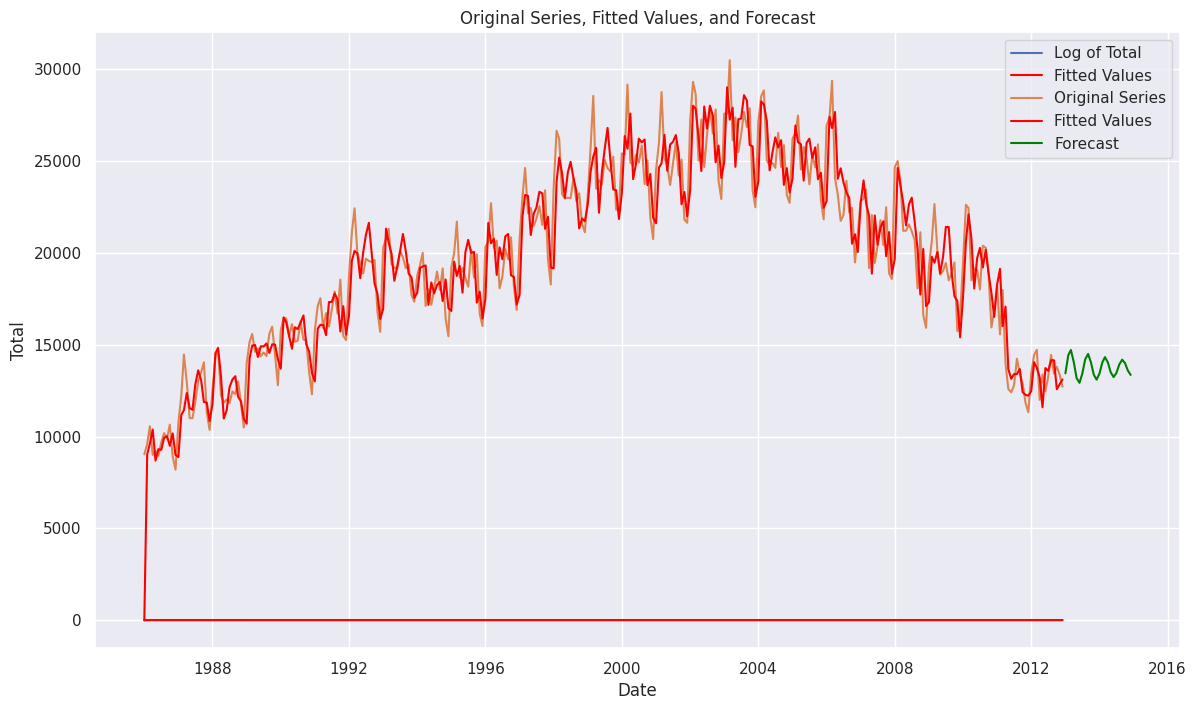

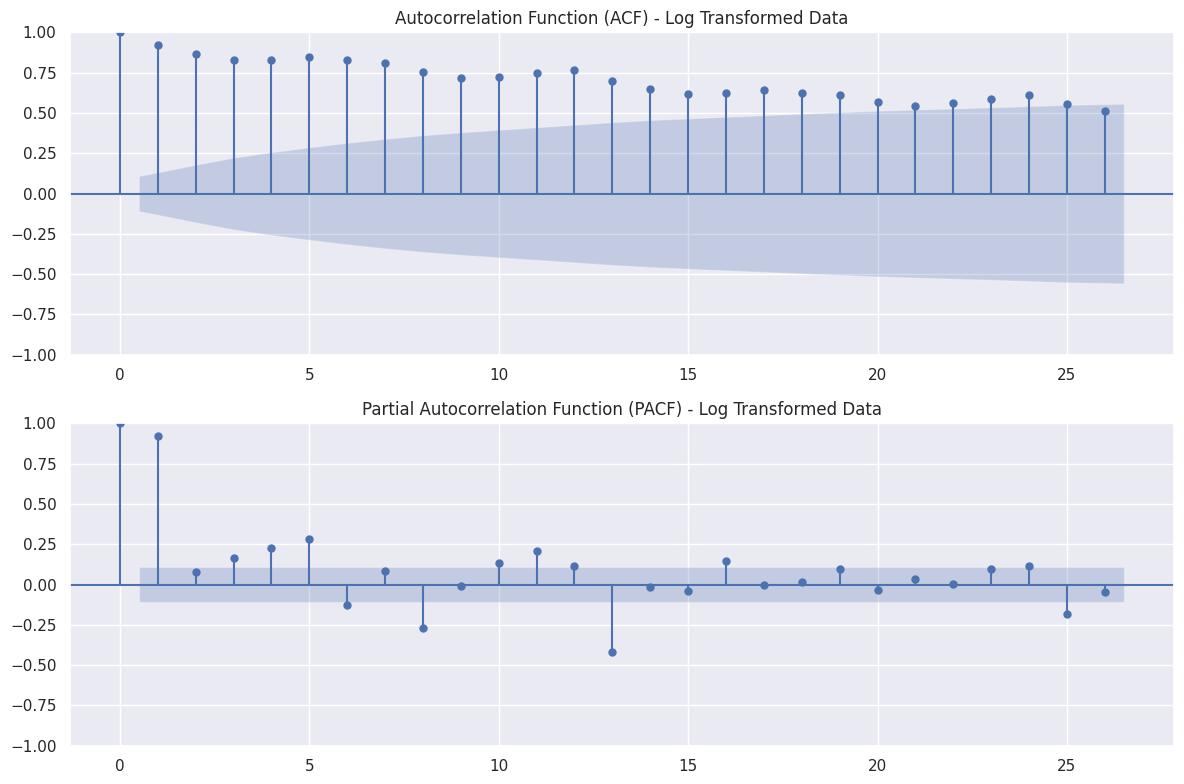

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA



# Log transformation to stabilize the variance
data_log = np.log(data['Total'])

# Check for stationarity with ADF test
result = adfuller(data_log.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Fit ARIMA model
model = ARIMA(data_log, order=(2, 1, 2))
arima_model = model.fit()

# Summary of the model
print(arima_model.summary())

# Plotting the original series, fitted values, and forecast
plt.figure(figsize=(14, 8))

# Original time series
plt.plot(data_log, label='Log of Total')

# Fitted values
plt.plot(arima_model.fittedvalues, color='red', label='Fitted Values')

# Forecast future values (e.g., next 24 months)
forecast_steps = 24
forecast = arima_model.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data_log.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

# Transform forecast back to original scale
forecast_original = np.exp(forecast)

# Combine original, fitted values, and forecast in the same plot
plt.plot(data_log.index, np.exp(data_log), label='Original Series')
plt.plot(arima_model.fittedvalues.index, np.exp(arima_model.fittedvalues), color='red', label='Fitted Values')
plt.plot(forecast_index, forecast_original, color='green', label='Forecast')

plt.legend()
plt.title('Original Series, Fitted Values, and Forecast')
plt.xlabel('Date')
plt.ylabel('Total')
plt.show()

# Create the ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(data_log.dropna(), ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF) - Log Transformed Data')

# Plot PACF
plot_pacf(data_log.dropna(), ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF) - Log Transformed Data')

plt.tight_layout()
plt.show()


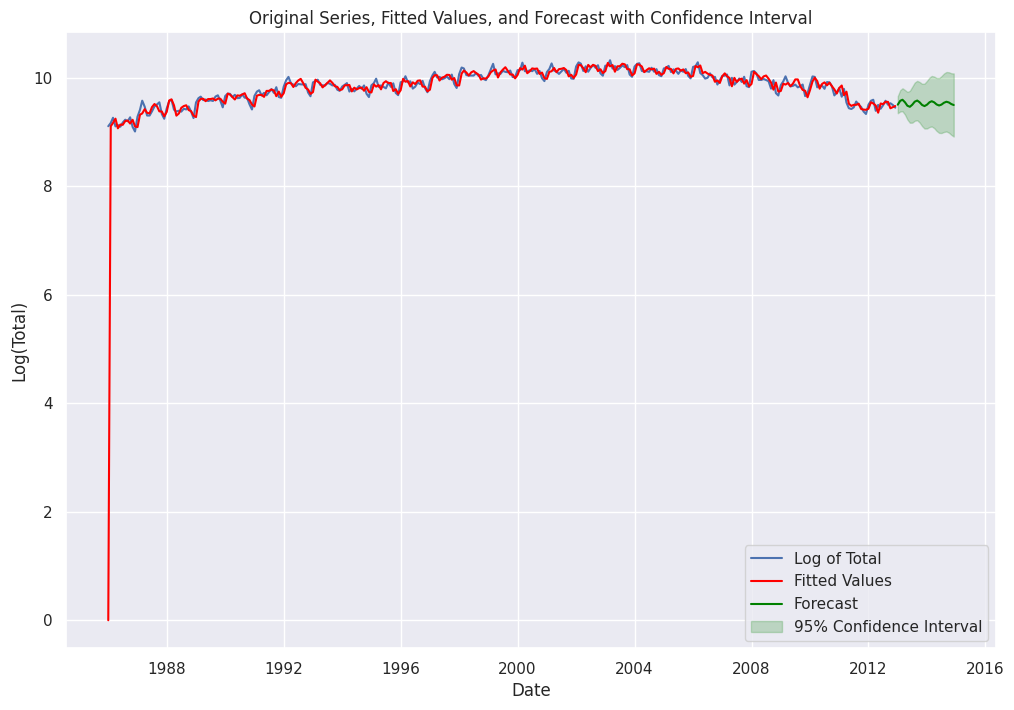

In [ ]:
# Log transformation to stabilize the variance
data_log = np.log(data['Total'])

# Fit ARIMA model
model = ARIMA(data_log, order=(2, 1, 2))
arima_model = model.fit()

# Generate forecast with confidence intervals
forecast_result = arima_model.get_forecast(steps=24, alpha=0.05)
forecast = forecast_result.predicted_mean
stderr = forecast_result.se_mean
conf_int = forecast_result.conf_int()

# Create forecast index
forecast_index = pd.date_range(start=data_log.index[-1] + pd.DateOffset(months=1), periods=24, freq='MS')

# Plotting the original series, fitted values, and forecast
plt.figure(figsize=(12, 8))
plt.plot(data_log, label='Log of Total')
plt.plot(arima_model.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecast_index, forecast, color='green', label='Forecast')

# Access the confidence intervals correctly
lower_conf = conf_int.iloc[:, 0]  # Lower bound
upper_conf = conf_int.iloc[:, 1]  # Upper bound

# Plot confidence intervals
plt.fill_between(forecast_index, lower_conf, upper_conf, color='green', alpha=0.2, label='95% Confidence Interval')

plt.legend()
plt.title('Original Series, Fitted Values, and Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Log(Total)')
plt.show()

# **SARIMA**

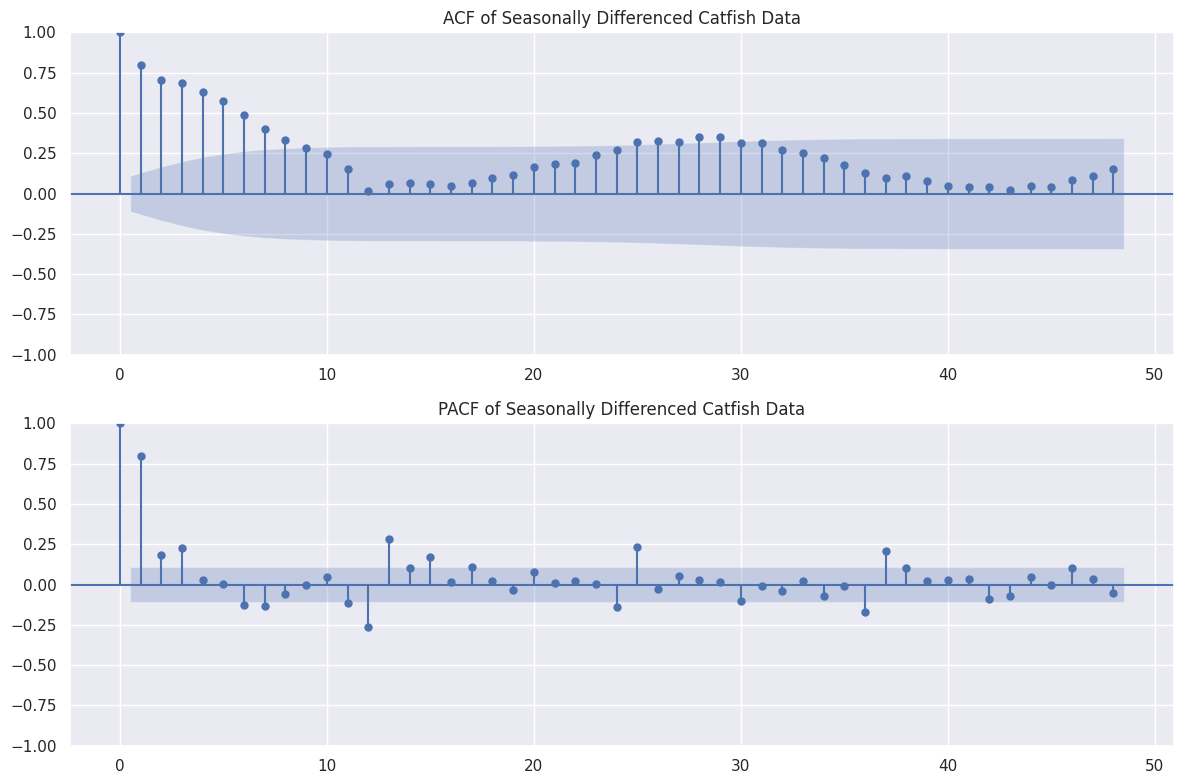

In [ ]:
# Seasonal differencing (for monthly data with annual seasonality, period=12)
data['Seasonal_Difference'] = data['Total'].diff(12) # Changed df to data

# Dropping NA values after differencing
seasonal_diff = data['Seasonal_Difference'].dropna() # Changed df to data

# Plot ACF and PACF for the seasonally differenced data
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(seasonal_diff, lags=48, ax=ax[0])
ax[0].set_title('ACF of Seasonally Differenced Catfish Data')

# PACF plot
plot_pacf(seasonal_diff, lags=48, ax=ax[1])
ax[1].set_title('PACF of Seasonally Differenced Catfish Data')

plt.tight_layout()
plt.show()

In [ ]:
# Define the SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(data['Total'], # Changed df to data
                                         order=(1, 1, 1),  # (p, d, q)
                                         seasonal_order=(1, 1, 1, 12),  # (P, D, Q, S) where S is the seasonal period
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)

# Fit the model
sarima_results = sarima_model.fit()

# Summary of the model
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                  324
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2463.587
Date:                            Fri, 26 Jul 2024   AIC                           4937.174
Time:                                    05:41:28   BIC                           4955.643
Sample:                                01-01-1986   HQIC                          4944.568
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1311      0.127      1.029      0.304      -0.119       0.381
ma.L1         -0.5396      0.112   

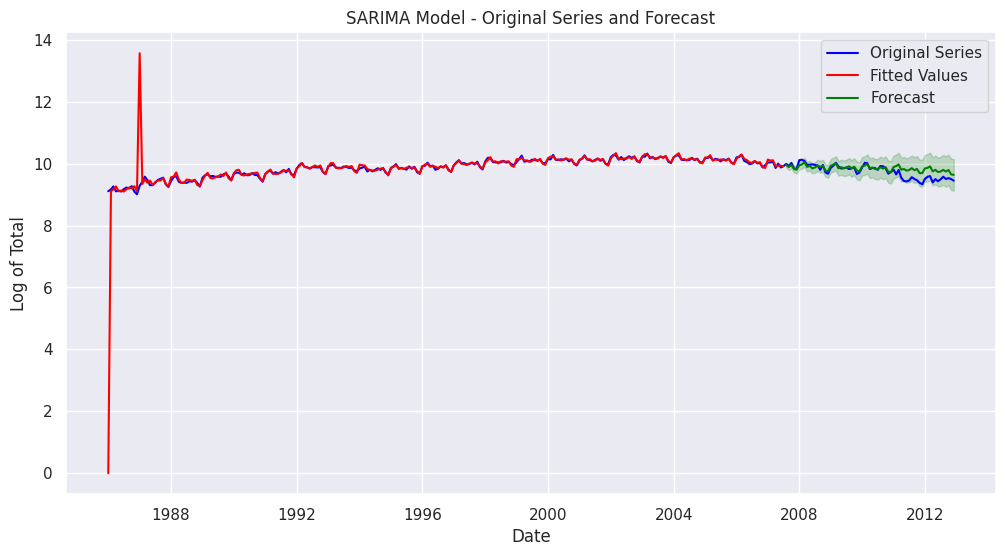

In [ ]:
# Log-transform the 'Total' data
data['Log_Total'] = np.log(data['Total']) # Changed df to data

# Split data into training and testing sets
train_data = data['Log_Total'][:int(0.8*len(data))] # Changed df to data
test_data = data['Log_Total'][int(0.8*len(data)):] # Changed df to data

# Fit SARIMA model
model = SARIMAX(train_data, order=(4, 1, 4), seasonal_order=(4, 1, 4, 12))
sarima_model = model.fit(disp=False)

# Predicting in-sample (fitted values) and out-of-sample (forecast)
fitted_values = sarima_model.fittedvalues
forecast_steps = len(test_data)
forecast = sarima_model.get_forecast(steps=forecast_steps)
forecast_index = test_data.index
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Log_Total'], label='Original Series', color='blue') # Changed df to data
plt.plot(train_data.index, fitted_values, label='Fitted Values', color='red')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.2)

plt.title('SARIMA Model - Original Series and Forecast')
plt.xlabel('Date')
plt.ylabel('Log of Total')
plt.legend()
plt.show()